In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data_train = pd.read_csv("~/math-ds/data_train.csv")

## Разведочный анализ

1. Узнаем форму датасета: количество строк и столбцов

In [24]:
data_train.shape

(3338655, 5)

В тренировочной выборке 3 338 655 строк и 5 колонок(столбцов)

2. Посмотрим на заголовки столбцов

In [26]:
data_train.columns

Index(['date', 'item_id', 'store_id', 'category', 'sale'], dtype='object')

У пяти колонок заголовки: Дата, Айди товара, Айди магазина, Категория товара, Продажи

3. Выведем первые и последние строки датасета

In [164]:
data_train

,date,item_id,store_id,category,sale
0,2015-07-02,1524,8,hobbies,0
1,2015-07-10,1873,7,hobbies,0
2,2015-07-11,1873,7,hobbies,0
3,2015-07-12,1873,7,hobbies,0
4,2015-07-13,1873,7,hobbies,0
...,...,...,...,...,...
3338650,2015-11-15,1322,8,foods,182
3338651,2015-01-12,930,8,foods,185
3338652,2015-01-11,930,8,foods,190
3338653,2015-11-26,702,9,foods,198


4. Определим типы данных

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338655 entries, 0 to 3338654
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   date      object
 1   item_id   int64 
 2   store_id  int64 
 3   category  object
 4   sale      int64 
dtypes: int64(3), object(2)
memory usage: 127.4+ MB


Дата и категория: объект, айди товара, айди магазина и продажи: целое число. 

Айди товара и айди магазина - порядковые числительные. 

5. Изучим статистические показатели для колонки с продажами

In [14]:
data_train['sale'].describe()

count    3.338655e+06
mean     1.190524e+00
std      3.362527e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.990000e+02
Name: sale, dtype: float64

Количество продаж 3 3368 655, матожидание 1.19, среднее квадратическое отклонение 3,363 , максимальное значение 299, минимальное значение 0.

### Группировка данных

6. Сгруппируем данные по категориям

In [28]:
data_train.groupby('category').category.count()

category
foods        1573515
hobbies       618675
household    1146465
Name: category, dtype: int64

В категории продукты 1 573 515 наблюдений, хобби 618 675, товары для дома 1 146 465. 

7. Сгруппируем данные по номеру магазина

In [16]:
data_train.groupby('store_id').store_id.count()

store_id
7    1112885
8    1112885
9    1112885
Name: store_id, dtype: int64

В каждом из магазинов по 1 125 885 наблюдений продаж

8. Сгруппируем данные по наименованию товара

In [17]:
data_train.groupby('item_id').item_id.count()

item_id
0       1095
1       1095
2       1095
3       1095
4       1095
        ... 
3044    1095
3045    1095
3046    1095
3047    1095
3048    1095
Name: item_id, Length: 3049, dtype: int64

Всего 3049 различных типов товаров, каждый был продан по 1095 раз в этом наборе данных.

9. Сгруппируем данные по дате

In [18]:
data_train.groupby('date').date.count()

date
2015-01-01    9147
2015-01-02    9147
2015-01-03    9147
2015-01-04    9147
2015-01-05    9147
              ... 
2015-12-27    9147
2015-12-28    9147
2015-12-29    9147
2015-12-30    9147
2015-12-31    9147
Name: date, Length: 365, dtype: int64

В каждый день года зафиксировано по 9147 наблюдений.

10. Сгруппируем данные по сумме чека (продаже)

In [19]:
data_train.groupby('sale').sale.count()

sale
0      2087238
1       555260
2       264216
3       138261
4        82694
        ...   
182          1
185          1
190          1
198          1
299          1
Name: sale, Length: 159, dtype: int64

Всего 159 значений продаж, чаще всего продажи данного товара отсутствовали (в 2 087 238 случаях). 

### Сводные таблицы

11. Выведем суммы продаж по категориям

In [78]:
category_pivot = data_train.pivot_table(index=['category'], values=['sale'], aggfunc='sum')

In [83]:
category_pivot

,sale
category,
foods,2766993
hobbies,328705
household,879052


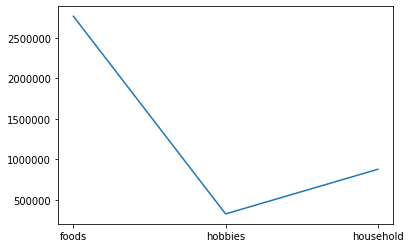

In [85]:
plt.plot(category_pivot)

In [73]:
store_pivot = data_train.pivot_table(index=['store_id'], values=['sale'], aggfunc='sum')

In [77]:
store_pivot

,sale
store_id,
7,1274924
8,1507628
9,1192198


12. Выведем продажи по категориям товаров и магазинам

In [90]:
sale_pivot = data_train.pivot_table(index=['category', 'store_id'], values=['sale'], aggfunc='sum')

In [91]:
sale_pivot

sale
category  store_id         
foods     7          865513
          8         1067843
          9          833637
hobbies   7          147674
          8           87559
          9           93472
household 7          261737
          8          352226
          9          265089

13. Выведем продажи по отдельным товарам

In [80]:
item_pivot = data_train.pivot_table(index=['item_id'], values=['sale'], aggfunc='sum')

In [81]:
item_pivot

,sale
item_id,
0,369
1,575
2,495
3,10351
4,966
...,...
3044,419
3045,302
3046,80


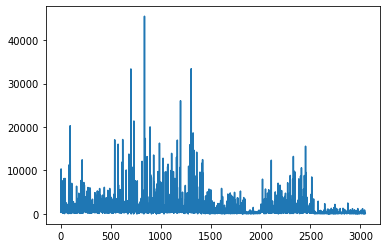

In [86]:
plt.plot(item_pivot)

14. Выведем продажи по категориям товаров, магазинам и отдельным товарам

In [93]:
sale_pivot_1 = data_train.pivot_table(index=['category', 'store_id', 'item_id'], values=['sale'], aggfunc='sum')

In [94]:
sale_pivot_1

sale
category  store_id item_id      
foods     7        0         160
                   1         333
                   2         361
                   3        3602
                   4         405
...                          ...
household 9        3044      100
                   3045      183
                   3046       27
                   3047       49
                   3048       48

[9147 rows x 1 columns]

15. Создадим отдельные таблицы по категориям товаров

In [108]:
foods = data_train[data_train['category'] == "foods"]
hobbies = data_train[data_train['category'] == "hobbies"]
household = data_train[data_train['category'] == "household"]

16. И сгруппируем их по айди товара:

In [105]:
foods.groupby('item_id').item_id.count()

item_id
0       1095
1       1095
2       1095
3       1095
4       1095
        ... 
1432    1095
1433    1095
1434    1095
1435    1095
1436    1095
Name: item_id, Length: 1437, dtype: int64

In [109]:
hobbies.groupby('item_id').item_id.count()

item_id
1437    1095
1438    1095
1439    1095
1440    1095
1441    1095
        ... 
1997    1095
1998    1095
1999    1095
2000    1095
2001    1095
Name: item_id, Length: 565, dtype: int64

In [110]:
household.groupby('item_id').item_id.count()

item_id
2002    1095
2003    1095
2004    1095
2005    1095
2006    1095
        ... 
3044    1095
3045    1095
3046    1095
3047    1095
3048    1095
Name: item_id, Length: 1047, dtype: int64

17. Сгруппируем таблицы по продажам отдельного товара:

In [119]:
foods_pivot = foods.pivot_table(index=['item_id'], values=['sale'], aggfunc='sum')
foods_pivot

,sale
item_id,
0,369
1,575
2,495
3,10351
4,966
...,...
1432,1029
1433,106
1434,889


In [124]:
hobbies_pivot = hobbies.pivot_table(index=['item_id'], values=['sale'], aggfunc='sum')
hobbies_pivot

,sale
item_id,
1437,229
1438,530
1439,133
1440,1099
1441,552
...,...
1997,403
1998,153
1999,359


In [123]:
household_pivot = household.pivot_table(index=['item_id'], values=['sale'], aggfunc='sum')
household_pivot

,sale
item_id,
2002,473
2003,651
2004,1080
2005,2260
2006,1101
...,...
3044,419
3045,302
3046,80


18. Построим графики продаж в зависимости от айди товара

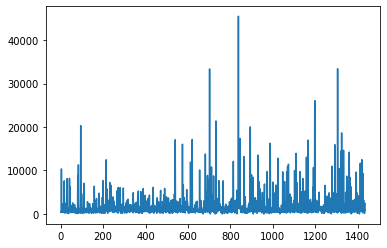

In [122]:
plt.plot(foods_pivot)

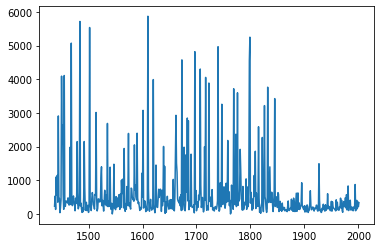

In [125]:
plt.plot(hobbies_pivot)

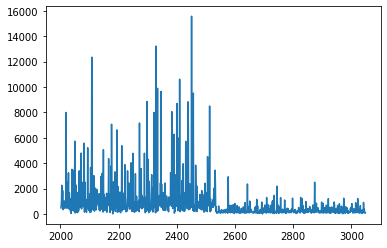

In [126]:
plt.plot(household_pivot)

19. Сделаем группировку по количеству продаж категории в каждый день

In [157]:
foods_date_pivot = foods.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
foods_date_pivot

,sale
date,
2015-01-01,5123
2015-01-02,9196
2015-01-03,9624
2015-01-04,7912
2015-01-05,7846
...,...
2015-12-27,6558
2015-12-28,4114
2015-12-29,5634


In [158]:
hobbies_date_pivot = hobbies.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
hobbies_date_pivot

,sale
date,
2015-01-01,667
2015-01-02,1207
2015-01-03,920
2015-01-04,757
2015-01-05,598
...,...
2015-12-27,864
2015-12-28,473
2015-12-29,745


In [159]:
household_date_pivot = household.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
household_date_pivot

,sale
date,
2015-01-01,1800
2015-01-02,3136
2015-01-03,2440
2015-01-04,1681
2015-01-05,1564
...,...
2015-12-27,2404
2015-12-28,1169
2015-12-29,1961


20. Нарисуем графики зависимости продаж по категориям от даты

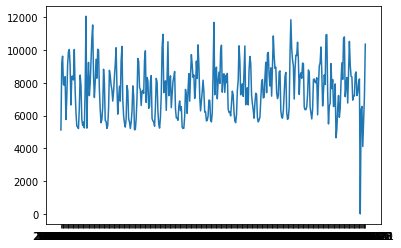

In [160]:
plt.plot(foods_date_pivot)

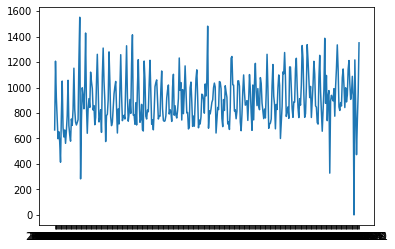

In [162]:
plt.plot(hobbies_date_pivot)

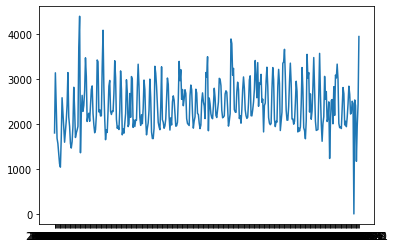

In [163]:
plt.plot(household_date_pivot)

На этих данных будем делать прогноз.